In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#load数据集
pga = pd.read_csv('pga.csv')
pga.head()
pga.distance=(pga.distance - pga.distance.mean())/ pga.distance.std()#标准化
pga.accuracy=(pga.accuracy - pga.accuracy.mean())/ pga.accuracy.std()
print (pga.head())

   distance  accuracy
0  0.314379 -0.707727
1  1.693777 -1.586669
2 -0.059695 -0.176699
3 -0.574047  0.372640
4  1.343083 -1.934584


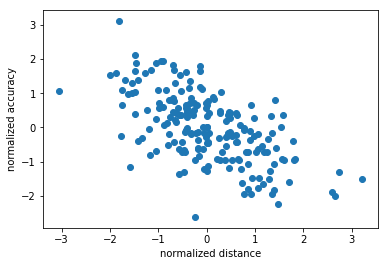

In [61]:
# Data preprocessing
# Normalize the data
pga['distance']=(pga['distance']-pga['distance'].mean())/pga['distance'].std()
pga['accuracy']=(pga['accuracy']-pga['accuracy'].mean())/pga['accuracy'].std()

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(pga['distance'],pga['accuracy'])
plt.xlabel('normalized distance')
plt.ylabel('normalized accuracy')
plt.show()


损失函数


In [62]:

#计算损失函数
def cost(theta0, theta1, x, y):
    # Initialize cost
    J = 0
    # The number of observations
    m = len(x)
    # Loop through each observation
    for i in range(m):
        # Compute the hypothesis 
        h = theta1 * x[i] + theta0
        # Add to cost
        J += (h - y[i])**2
    # Average and normalize cost
    J /= (2*m)
    return J
print(cost(0,1,pga.distance,pga.accuracy))

1.5994384225998166


In [63]:
def partial_cost_theta0(theta0, theta1, x, y):
    # Hypothesis
    h = theta0 + theta1*x
    # Difference between hypothesis and observation
    diff = (h - y)
    # Compute partial derivative
    partial = diff.sum() / (x.shape[0])
    return partial

partial0 = partial_cost_theta0(1, 1, pga.distance, pga.accuracy)

def partial_cost_theta1(theta0,theta1,x,y):
    h = theta1*x + theta0
    diff = (h-y)*x
    partial = diff.sum()/(x.shape[0])
    return partial
partial1 = partial_cost_theta0(0, 5, pga.distance, pga.accuracy)
print("partial1=",partial1)

partial1= 7.21363183512792e-17


Theta1 = -0.6046983166379608


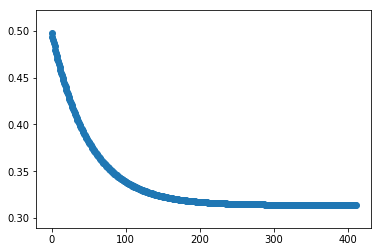

In [64]:
# x is our feature vector -- distance
# y is our target variable -- accuracy
# alpha is the learning rate
# theta0 is the intial theta0 
# theta1 is the intial theta1
def gradient_descent(x, y, alpha=0.1, theta0=0, theta1=0):
    max_epochs = 1000 # Maximum number of iterations
    counter = 0      # Intialize a counter
    c = cost(theta1, theta0, pga.distance, pga.accuracy)  ## Initial cost
    costs = [c]     # Lets store each update
    # Set a convergence threshold to find where the cost function in minimized
    # When the difference between the previous cost and current cost 
    #        is less than this value we will say the parameters converged
    convergence_thres = 0.000001  
    cprev = c + 10   
    theta0s = [theta0]
    theta1s = [theta1]

    # When the costs converge or we hit a large number of iterations will we stop updating
    while (np.abs(cprev - c) > convergence_thres) and (counter < max_epochs):
        cprev = c
        # Alpha times the partial deriviative is our updated
        update0 = alpha * partial_cost_theta0(theta0, theta1, x, y)
        update1 = alpha * partial_cost_theta1(theta0, theta1, x, y)

        # Update theta0 and theta1 at the same time
        # We want to compute the slopes at the same set of hypothesised parameters
        #             so we update after finding the partial derivatives
        theta0 -= update0
        theta1 -= update1

        # Store thetas
        theta0s.append(theta0)
        theta1s.append(theta1)

        # Compute the new cost
        c = cost(theta0, theta1, pga.distance, pga.accuracy)

        # Store updates
        costs.append(c)
        counter += 1   # Count

    return {'theta0': theta0, 'theta1': theta1, "costs": costs}

print("Theta1 =", gradient_descent(pga.distance, pga.accuracy)['theta1'])
descend = gradient_descent(pga.distance, pga.accuracy, alpha=.01)
plt.scatter(range(len(descend["costs"])), descend["costs"])
plt.show()
